<a href="https://colab.research.google.com/github/Ganeshwalimbe/Bike-Sharing-Demand-Prediction---Capstone-Project/blob/main/Ganesh_Walimbe_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/AlmaBetter /Capstone projects /ML project 1 /SeoulBikeData.csv',encoding = 'unicode_escape')

In [ ]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**cheking if there are missing values presnt in data**

In [ ]:
data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Checking Duplicate Values
value=len(data[data.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [ ]:
data.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
data['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [ ]:
data['Solar Radiation (MJ/m2)'].value_counts()

0.00    4300
0.01     128
0.02      82
0.03      69
0.06      61
        ... 
3.38       1
2.97       1
3.44       1
3.49       1
3.45       1
Name: Solar Radiation (MJ/m2), Length: 345, dtype: int64

**Modifying date column**

In [ ]:
from datetime import datetime
import datetime as dt
# Changing the "Date" column into three "year","month","day" column
data['Date'] = data['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [ ]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day_name()

In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
data['weekend']=data['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
data=data.drop(columns=['Date','day','year'],axis=1)

In [ ]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
#Change the int64 column into catagory column
cols=['Hour','month','weekend']
for col in cols:
  data[col]=data[col].astype('category')

# **Exploratory Data Analysis (EDA)**
Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

monthly rental of bikes analysis

[Text(0.5, 1.0, 'Number of Rented bikes acording to Month ')]

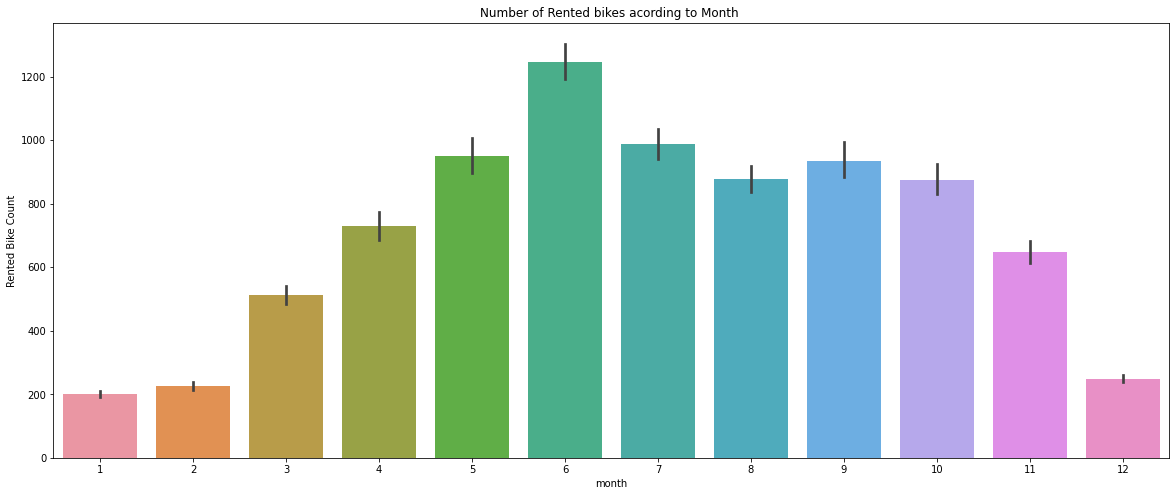

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=data,x='month',y='Rented Bike Count',ax=ax)
ax.set(title='Number of Rented bikes acording to Month ')

**From the above barplot we can see that maximum number of bikes rented in the month of June and followed by May ,july,August,september and october .**

Weekdays and weekend 

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays and weekend ')]

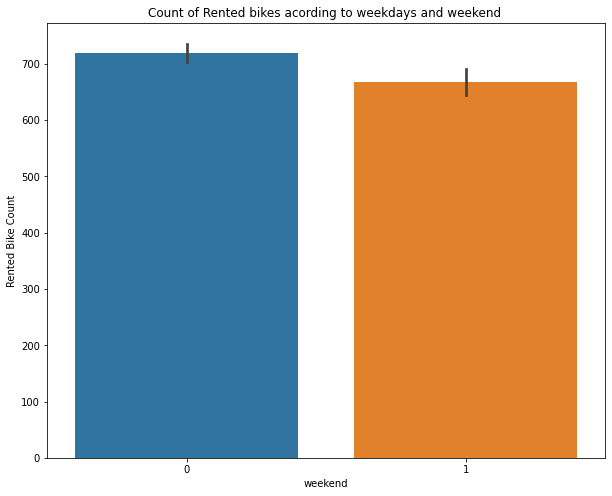

In [ ]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=data,x='weekend',y='Rented Bike Count',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays and weekend ')

***From the above plot we can say that people rent bikes slightly more bikes in weekdays as compared to weekend ***

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays and weekend ')]

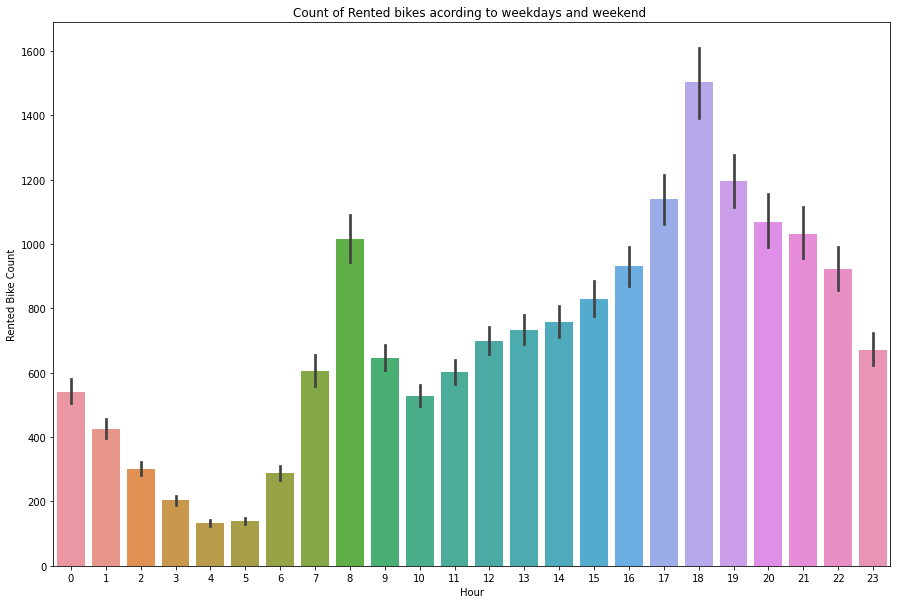

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
sns.barplot(data=data,x='Hour',y='Rented Bike Count',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays and weekend ')

**From the above plot we can say that peak time of renting bike  at 7am to 9am in the morning and from 5pm to 10pm in the evening .**



[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

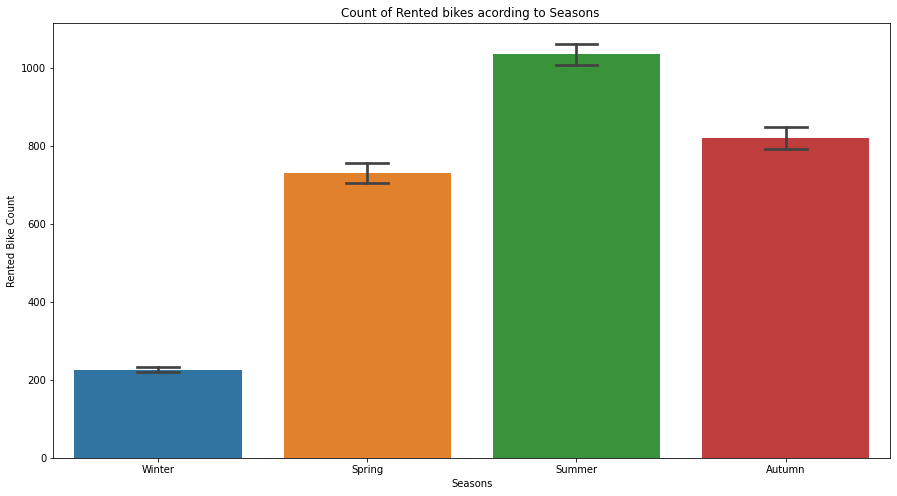

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=data,x='Seasons',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

In the above bar plot which shows the use of rented bike in in four different 
seasons, and it clearly shows that, 

In summer season the use of rented bike is high 

In winter season the use of rented bike is very low because of snowfall. 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  month                      8760 n

### Analysis of numerical variables

In [ ]:
Numerical_features=['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)','Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)','Snowfall (cm)']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

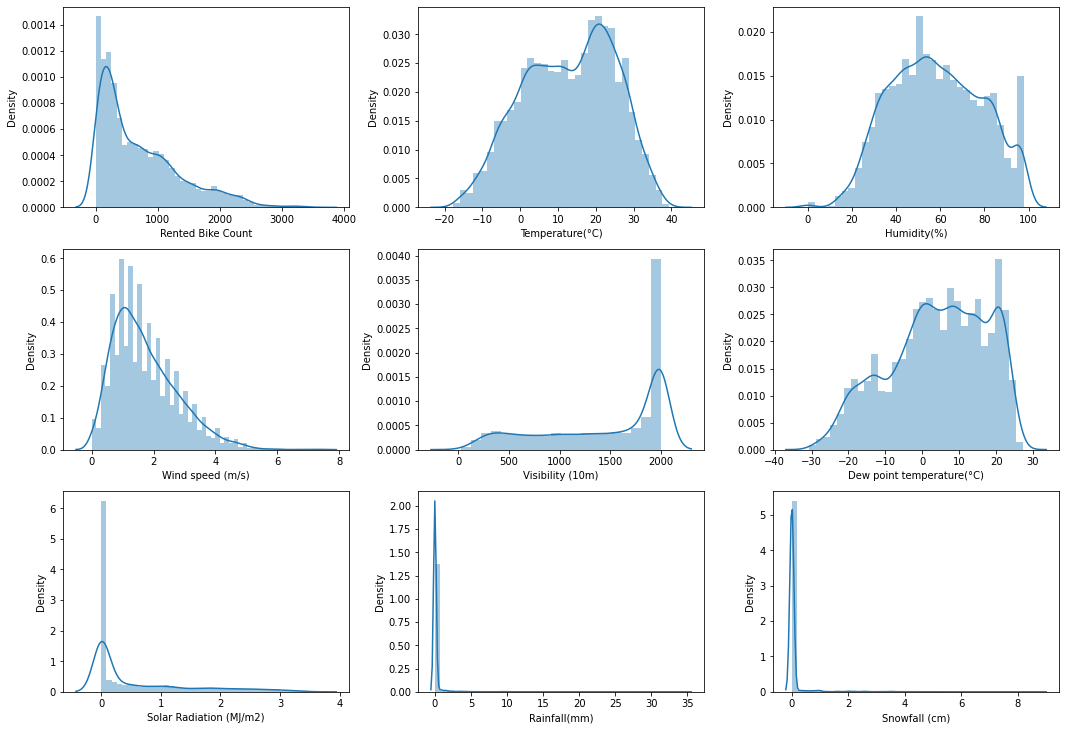

In [ ]:
fig=plt.figure(figsize=(15,30))

for i in range(len(Numerical_features)):
    fig.add_subplot(9, 3, i+1)
    
    sns.distplot(data[Numerical_features[i]])
plt.tight_layout()
plt.show()

From above distribution plots we can say that,

*  Rented bike count,Wind speed,solar radiation,rainfall,snowfall are right skewed variables 
*  Visibilty,Dew point temperature are right skewed variables.
*  Temperature,Humidity and wind speed are approximately normal. 



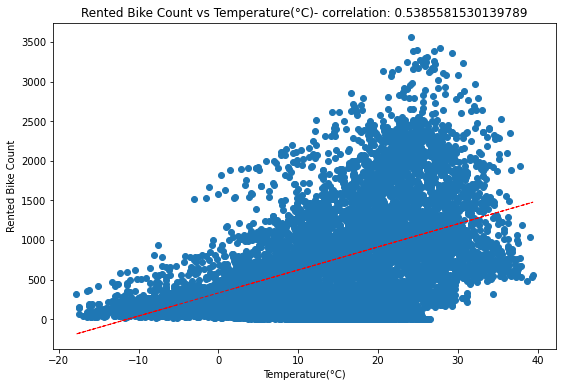

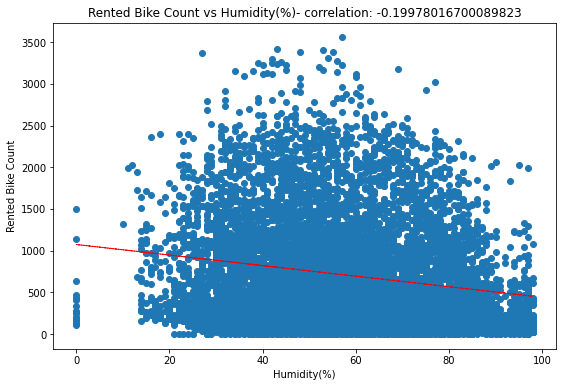

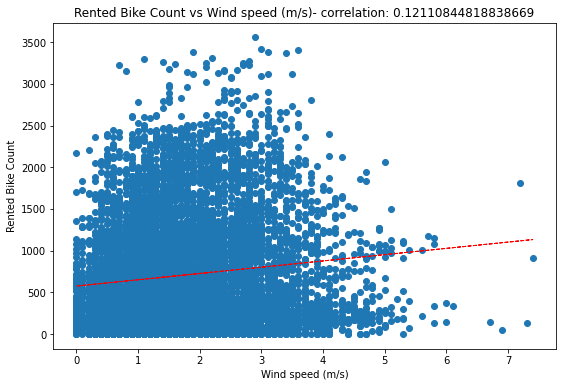

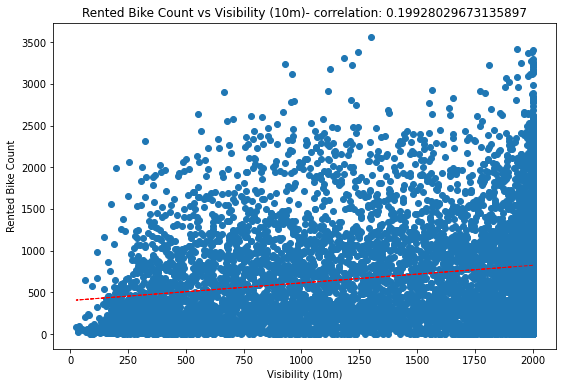

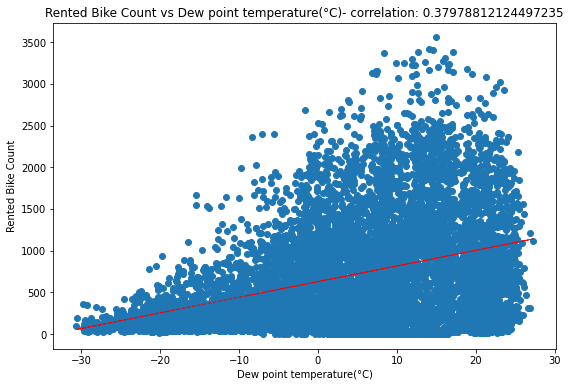

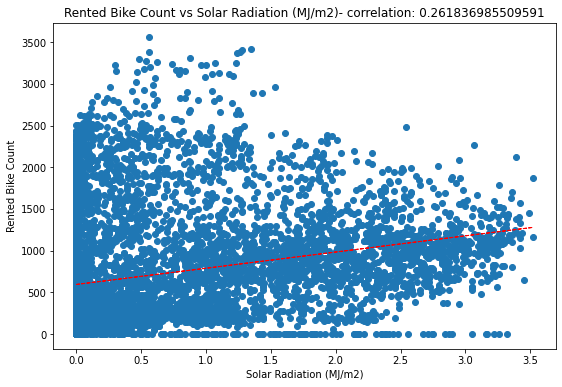

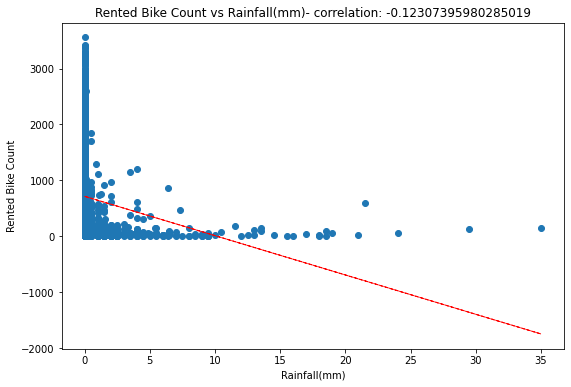

In [ ]:
for col in Numerical_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data[col], data['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(data[col])

    plt.plot(data[col], y_hat, "r--", lw=1)

plt.show()

From the above scatter plots we can that ,


*  Temperature is highly positively correlated with rental bike count target variable
*  Dew point temperature ,solar radiation,visibilty,Wind speed is moderately positively correlated with rental bike count target variable

*   humidity and rainfall are negtively moderately correlated with rental bike count variable 





**Target variable**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


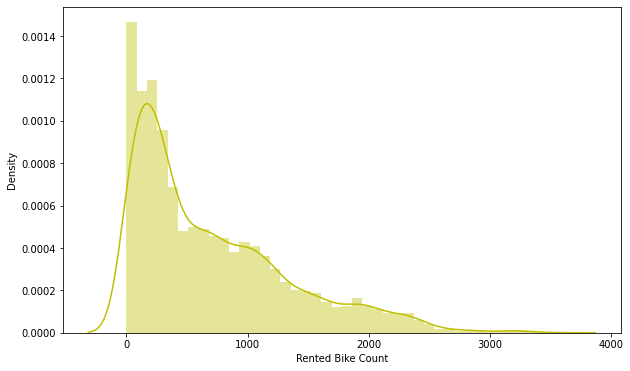

In [ ]:
#cheking if target variable follows normal distribution
plt.figure(figsize=(10,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(data['Rented Bike Count'],hist=True ,color="y")
plt.show()

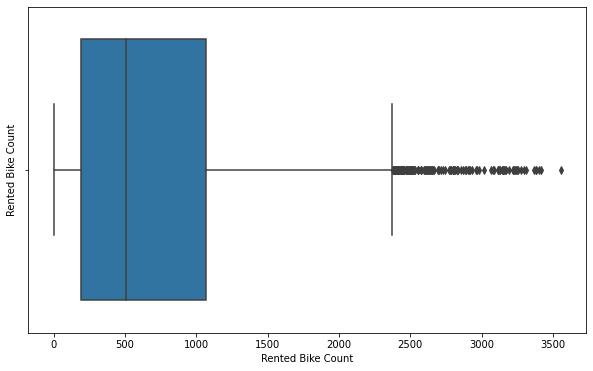

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=data['Rented Bike Count'])
plt.show()

**From above analysis we can say that our target variable is right skewed and contains some outliers .So we wil use take the square root of varible to improve the skewness and approximte it to follow normal distribution.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


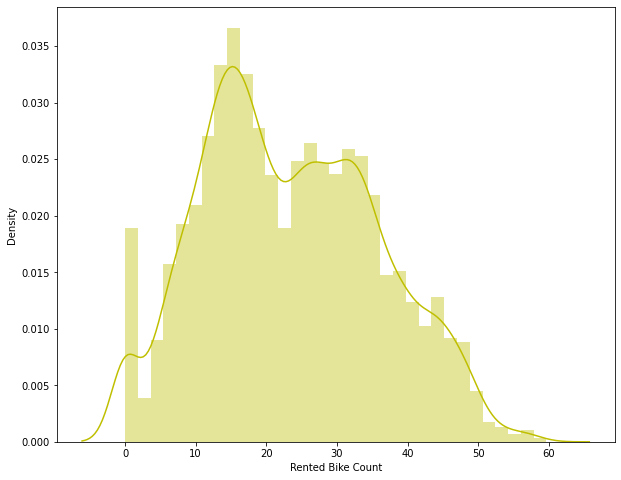

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(np.sqrt(data['Rented Bike Count']), color="y")
plt.show()

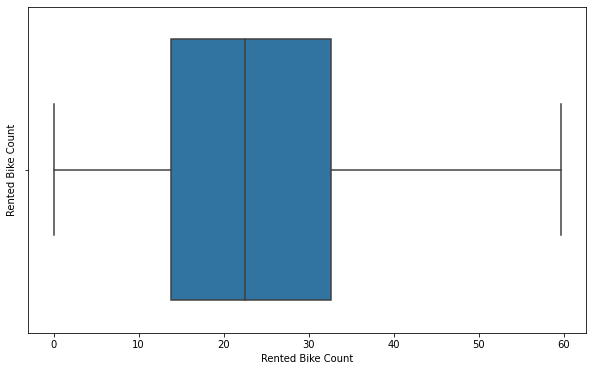

In [ ]:
plt.figure(figsize=(10,6))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(data['Rented Bike Count']))
plt.show()

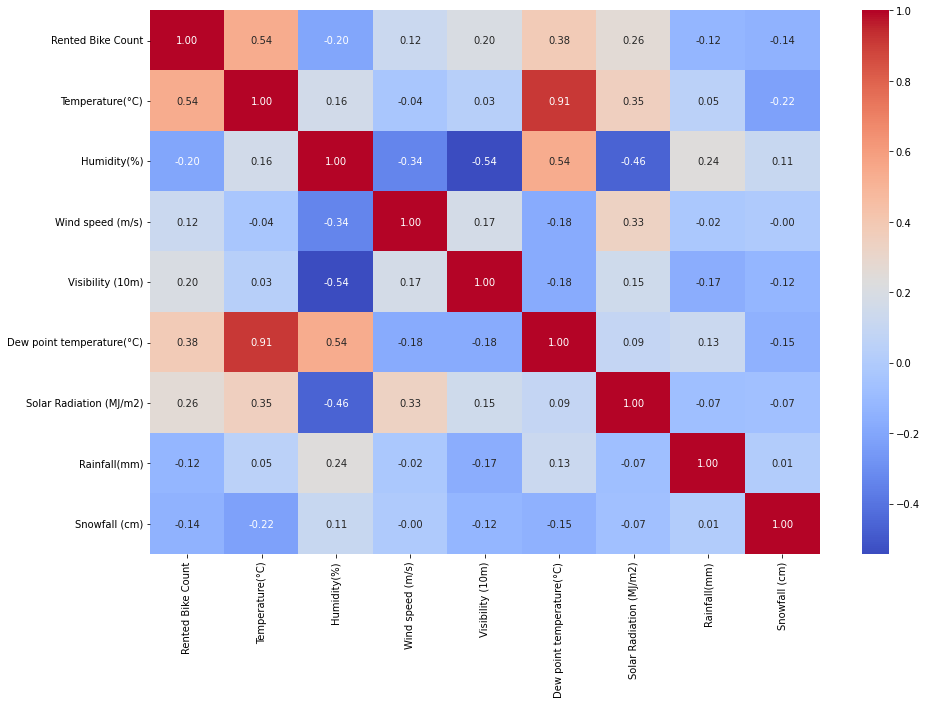

In [ ]:
#plotting correlation plot 
corr=data.corr()
fig=plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

**Feature engineering**

In [ ]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Functioning Day']= label_encoder.fit_transform(data['Functioning Day'])
  
data['Functioning Day'].unique()


array([1, 0])

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Holiday']= label_encoder.fit_transform(data['Holiday'])
  
data['Holiday'].unique()

array([1, 0])

In [ ]:
data=pd.get_dummies(data,columns=['Seasons','Hour','month'])

In [ ]:
data.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#defining independent and dependent variables
independent_variables=data.drop('Rented Bike Count',axis=1)
dependent_variable=np.sqrt(data['Rented Bike Count'])

**Validating Assumptions**

In [ ]:
independent_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Temperature(°C)            8760 non-null   float64 
 1   Humidity(%)                8760 non-null   int64   
 2   Wind speed (m/s)           8760 non-null   float64 
 3   Visibility (10m)           8760 non-null   int64   
 4   Dew point temperature(°C)  8760 non-null   float64 
 5   Solar Radiation (MJ/m2)    8760 non-null   float64 
 6   Rainfall(mm)               8760 non-null   float64 
 7   Snowfall (cm)              8760 non-null   float64 
 8   Holiday                    8760 non-null   int64   
 9   Functioning Day            8760 non-null   int64   
 10  weekend                    8760 non-null   category
 11  Seasons_Autumn             8760 non-null   uint8   
 12  Seasons_Spring             8760 non-null   uint8   
 13  Seasons_Summer             8760 n

# ***Validating Assumptions of Linear Regression ***

***Cheking if there is Multicollinearity ***

Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model. Multicollinearity can lead to skewed or misleading results when a researcher or analyst attempts to determine how well each independent variable can be used most effectively to predict or understand the dependent variable in a statistical model.

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(independent_variables):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = independent_variables.columns
    vif["VIF"] = [variance_inflation_factor(independent_variables.values, i) for i in range(independent_variables.shape[1])]

    return(vif)

In [ ]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Rented Bike Count']]])

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Temperature(°C),99.007405
1,Humidity(%),21.243244
2,Wind speed (m/s),1.426298
3,Visibility (10m),2.309550
4,Dew point temperature(°C),125.389013
5,Solar Radiation (MJ/m2),4.773381
6,Rainfall(mm),1.112106
7,Snowfall (cm),1.144230
8,Holiday,1.042744
9,Functioning Day,1.084080


In [ ]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Hour_1','month_6']]])

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Temperature(°C),11.240743
1,Humidity(%),3.102866
2,Wind speed (m/s),1.426260
3,Visibility (10m),2.309509
4,Solar Radiation (MJ/m2),4.635317
5,Rainfall(mm),1.096258
6,Snowfall (cm),1.137396
7,Holiday,1.042741
8,Functioning Day,1.082953
9,Seasons_Autumn,inf


In [ ]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Hour_1','month_6','month_3','month_4','month_1','month_10','Seasons_Spring']]])

,variables,VIF
0,Temperature(°C),19.815457
1,Humidity(%),17.948959
2,Wind speed (m/s),5.238728
3,Visibility (10m),10.275980
4,Solar Radiation (MJ/m2),6.514491
5,Rainfall(mm),1.109775
6,Snowfall (cm),1.163885
7,Holiday,18.630845
8,Functioning Day,24.887680
9,Seasons_Autumn,5.183991


Removing variables having high multicollinearity

In [ ]:
independent_var=independent_variables.drop(['Dew point temperature(°C)','Hour_1','month_6','month_3','month_4','month_1','month_10','Seasons_Spring'],axis=1)
independent_var.shape

(8760, 43)

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( independent_var,dependent_variable , test_size = 0.2, random_state = 0) 
print(x_train.shape)
print(x_test.shape)

(7008, 43)
(1752, 43)


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)

In [ ]:
reg.score(x_train, y_train)

0.7743987734371468

In [ ]:
y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2score=r2_score(y_test, y_test_pred)
r2score

0.784707129852672

In [ ]:
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

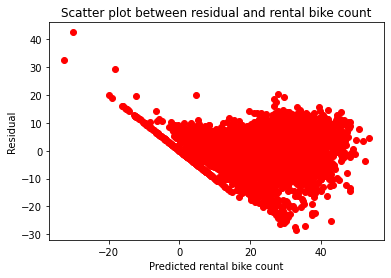

In [ ]:
#  Plotting scatter plot between residual and fitted values
plt.scatter(y_train_pred, residuals_train,c='red')
plt.title('Scatter plot between residual and rental bike count')
plt.xlabel('Predicted rental bike count')
plt.ylabel('Residual')
plt.show()

From above plot we can say that there is no heteroscedasticity prent in data 

In [ ]:
round((np.mean(residuals_train)))

0

Yes, the mean of residuals is almost zero!

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import math

In [ ]:
r2score=r2_score(y_test, y_test_pred)

In [ ]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2_score is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('Adj_R2_score is {}'.format(1-(1-r2score)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))))

In [ ]:
#Training_dataset_metrics
print_metrics(y_train, y_train_pred)

MSE is 34.817741769952825
RMSE is 5.900656045725155
R2_score is 0.7743987734371468
MAE is 4.4639451242331765
Adj_R2_score is 0.7792869931920543


In [ ]:
#Test_dataset_metrics
print_metrics(y_test, y_test_pred)

MSE is 33.905668316490555
RMSE is 5.822857401352927
R2_score is 0.784707129852672
MAE is 4.444111348257234
Adj_R2_score is 0.7792869931920543


***The r2_score for the test set is 0.78 This means our linear regression model is performing well on the data. ***

# **Lasso regression**

In [ ]:
independent_variables.shape

(8760, 51)

In [ ]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(x_train, y_train)

Lasso(max_iter=3000)

In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(x_train)
y_pred_test_lasso=lasso.predict(x_test)

In [ ]:
r2score_lasso=r2_score(y_test, y_pred_test_lasso)

In [ ]:
# Create the model score
print(lasso.score(x_train, y_train))

0.4048286433798308


In [ ]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2_score is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('Adj_R2_score is {}'.format(1-(1-r2score_lasso)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))))

In [ ]:
# Training dataset metrics
print_metrics(y_train, y_pred_train_lasso)

MSE is 91.85465398123709
RMSE is 9.584083366772072
R2_score is 0.4048286433798308
MAE is 7.267171202255601
Adj_R2_score is 0.3681798790716583


In [ ]:
# Testing  dataset metrics
print_metrics(y_test, y_pred_test_lasso)

MSE is 97.05945184518272
RMSE is 9.851875549619104
R2_score is 0.38369573583917327
MAE is 7.4573120369945896
Adj_R2_score is 0.3681798790716583


***The r2_score for the test set is 0.38 . This means our lasso regression model is not performing well on the data. ***

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.081e+04, tolerance: 7.250e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.932e+04, tolerance: 7.234e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -35.3987974366096


In [ ]:
y_pred_lasso = lasso_regressor.predict(x_test)

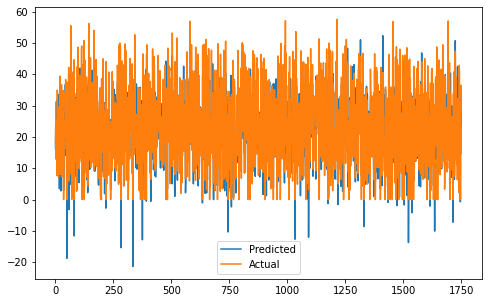

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_lasso))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 33.91094156718748
RMSE : 5.8233101898479935
R2 : 0.7846736459741962
Adjusted R2 :  0.7792526663353733


In [ ]:
# Training dataset metrics
print_metrics(y_train, y_pred_train_lasso)

***The R2_score after hyperparameters tunning is 0.78 .This means our lasso regression model is performing well on the data. ***

# **RIDGE REGRESSION**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge= Ridge(alpha=0.1)

In [ ]:
ridge.fit(x_train,y_train)


Ridge(alpha=0.1)

In [ ]:
#check the score
ridge.score(x_train, y_train)

0.7743986401169649

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(x_train)
y_pred_test_ridge=ridge.predict(x_test)

In [ ]:
r2score_ridge=r2_score(y_test, y_pred_test_ridge)

In [ ]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2_score is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('adj_r2_score is {}'.format(1-(1-r2score_ridge)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))))

In [ ]:
# Training dataset metrics
print_metrics(y_train, y_pred_train_ridge)

MSE is 34.81776234567281
RMSE is 5.900657789236113
R2_score is 0.7743986401169649
MAE is 4.464062543032918
adj_r2_score is 0.7792742823039116


In [ ]:
# testing  dataset metrics
print_metrics(y_test, y_pred_test_ridge)

MSE is 33.90762094793536
RMSE is 5.823025068461869
R2_score is 0.7846947311108401
MAE is 4.444422895352889
adj_r2_score is 0.7792742823039116


***The r2_score for the test set is 0.78  This means our ridge regression model is performing well on the data. ***

In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -35.40015138670564


In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(x_test)

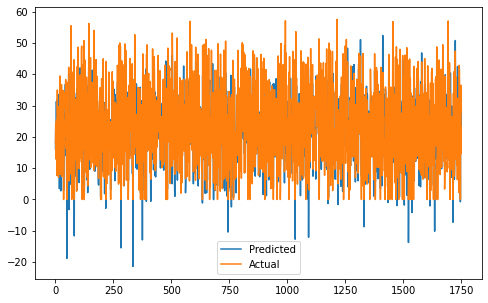

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 33.90586231679181
RMSE : 5.822874059842941
R2 : 0.7847058979972407
Adjusted R2 :  0.7792857303238692


***The r2_score for the test set after hyperparameter tunnig is 0.78 This means our ridge regression model is performing well on the data. ***

# **Elastic net regression**

In [ ]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#check the score
elasticnet.score(x_train, y_train)

0.6212867862887405

In [ ]:
#get the X_train and X-test value
y_pred_train_el=elasticnet.predict(x_train)
y_pred_test_el=elasticnet.predict(x_test)

In [ ]:
r2score_el=r2_score(y_test, y_pred_test_el)

In [ ]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2_score is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('Adj_R2_score is {}'.format(1-(1-r2score_el)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))))

In [ ]:
# Training dataset metrics
print_metrics(y_train, y_pred_train_el)

MSE is 58.44799286228148
RMSE is 7.645128701485769
R2_score is 0.6212867862887405
MAE is 5.8264410123812
Adj_R2_score is 0.6047665429467163


In [ ]:
# Testing dataset metrics
print_metrics(y_test, y_pred_test_el)

MSE is 60.71529130174544
RMSE is 7.792001751908519
R2_score is 0.6144724473746381
MAE is 5.9027708550477564
Adj_R2_score is 0.6538266735147509


**The r2_score for the test set is 0.61 . This means our elastic net regression  model is performing well on the data.** 

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.667e+04, tolerance: 8.747e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.484e+04, tolerance: 8.603e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
y_pred_elastic = elastic_regressor.predict(x_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.4}

Using  {'alpha': 0.0001, 'l1_ratio': 0.4}  the negative mean squared error is:  -35.42970614067199


In [ ]:
MSE  = mean_squared_error((y_test),(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_elastic)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 33.91417832175735
RMSE : 5.823588096848655
R2 : 0.784653093358191
Adjusted R2 :  0.7792315962940237


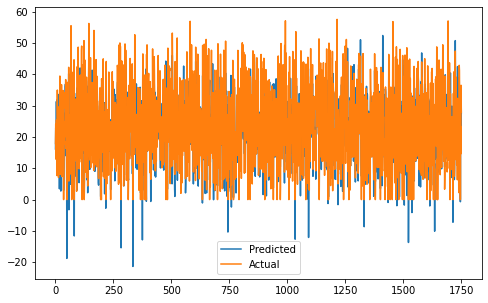

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_elastic))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

**The r2_score for the test set after hyperparameter tunning is 0.78. This means our elastic net regression model is performing well on the data.**

# **DECISION TREE**

In [ ]:
from sklearn.model_selection import train_test_split 
x_train1, x_test1, y_train1, y_test1 = train_test_split( independent_variables,dependent_variable , test_size = 0.2, random_state = 0) 
print(x_train1.shape)
print(x_test1.shape)

(7008, 51)
(1752, 51)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(x_train1, y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#get the X_train and X-test value
y_pred_train_dt = decision_regressor.predict(x_train1)
y_pred_test_dt = decision_regressor.predict(x_test1)

In [ ]:
r2score_dt=r2_score(y_test1, y_pred_test_dt)

In [ ]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2_score is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('Adj_R2_score is {}'.format(1-(1-r2score_dt)*((x_test1.shape[0]-1)/(x_test1.shape[0]-x_test1.shape[1]-1))))

In [ ]:
#Training data metrics 
print_metrics(y_train1, y_pred_train_dt)

MSE is 47.93620841653809
RMSE is 6.923597938683188
R2_score is 0.6893977936019883
MAE is 5.050593674132065
Adj_R2_score is 0.6538266735147509


In [ ]:
#Testing data metrics 
print_metrics(y_test1, y_pred_test_dt)


MSE is 52.9296519639074
RMSE is 7.275276762014446
R2_score is 0.6639093917618941
MAE is 5.219255022241323
Adj_R2_score is 0.6538266735147509


***The r2_score for the test set is 0.66 . This means our Decision Tree  model is performing well on the data. ***

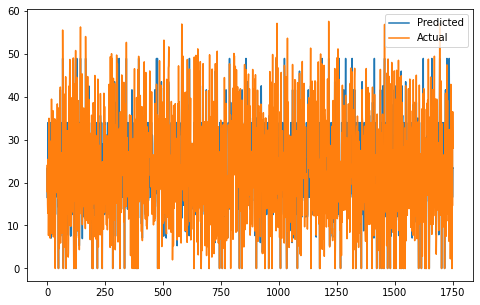

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_dt))
plt.plot((np.array(y_test1)))
plt.legend(["Predicted","Actual"])
plt.show()

# **RANDOM FOREST**

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(x_train1,y_train1)

RandomForestRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_rf = rf_model.predict(x_train1)
y_pred_test_rf = rf_model.predict(x_test1)

In [ ]:
r2score_rf=r2_score(y_test1, y_pred_test_rf)

In [ ]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2_score is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('Adj_R2_score is {}'.format(1-(1-r2score_rf)*((x_test1.shape[0]-1)/(x_test1.shape[0]-x_test1.shape[1]-1))))

In [ ]:
#Training data metrics 
print_metrics(y_train1, y_pred_train_rf)

MSE is 1.5603016966938077
RMSE is 1.2491203691773693
R2_score is 0.9898900400000669
MAE is 0.7839264771527887
Adj_R2_score is 0.9185181327717464


In [ ]:
#Testinf data metrics 
print_metrics(y_test1, y_pred_test_rf)

MSE is 12.458518735540261
RMSE is 3.5296626943010097
R2_score is 0.9208913910405305
MAE is 2.1903766546083574
Adj_R2_score is 0.9185181327717464


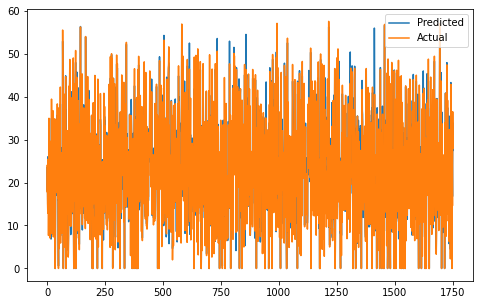

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_rf))
plt.plot((np.array(y_test1)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
rf_model.feature_importances_

array([3.11148971e-01, 1.47534266e-01, 1.05974442e-02, 1.04916964e-02,
       1.95734863e-02, 2.89240963e-02, 3.07441216e-02, 1.44482616e-03,
       4.03256492e-03, 1.51433140e-01, 1.84487332e-02, 1.29186022e-02,
       1.99257276e-03, 7.93869949e-04, 5.62351985e-03, 2.89837916e-03,
       5.56414552e-03, 1.40863692e-02, 2.08154716e-02, 3.10209341e-02,
       2.73132988e-02, 8.65571259e-03, 4.23791204e-03, 1.37519465e-02,
       8.75055381e-04, 2.05802862e-03, 1.02339862e-03, 2.37701340e-04,
       2.31442124e-04, 3.12566368e-04, 1.25645446e-03, 3.14629746e-03,
       1.00649245e-02, 3.28240068e-02, 1.55741939e-02, 1.06392413e-02,
       1.05723361e-02, 8.20395321e-03, 3.72049704e-03, 1.78602245e-04,
       2.27539818e-04, 3.82627442e-03, 1.08875831e-03, 1.25682310e-03,
       1.86261264e-03, 5.31473801e-04, 1.45317540e-03, 6.59964392e-04,
       2.08308757e-03, 1.31760888e-03, 7.27901398e-04])

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(x_train1.columns),
                   'Feature Importance' : importances}

In [ ]:
importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False).head(10)

,Feature,Feature Importance
0,Temperature(°C),0.311149
9,Functioning Day,0.151433
1,Humidity(%),0.147534
33,Hour_18,0.032824
19,Hour_4,0.031021
6,Rainfall(mm),0.030744
5,Solar Radiation (MJ/m2),0.028924
20,Hour_5,0.027313
18,Hour_3,0.020815
4,Dew point temperature(°C),0.019573


***The r2_score for the test set is 0.92 . This means our Random forest  model is performing very well on the data. ***

# **Conclusions :**


1.   From exploratory data anlysis of the given data we can see that 


*  The maximum number of bikes rented in the month of June and followed by May ,july,August,september and october .
*  The people rent bikes slightly more bikes in weekdays as compared to weekend 


*   peak time of renting bike at 7am to 9am in the morning and from 5pm to 10pm in the evening .People mostly use the rental bikes to go their workplace so that's  why company should increase the availabilty of the bikes during the peak hours.
*  In summer season the use of rented bike is high and In winter season the use of rented bike is very low because of snowfall .

2.  From the scatter plots we can that ,

*   Temperature is highly positively correlated with rental bike count target 
variable.people prefer renting bike when the temperature normal not to hot and not too cold outside
*  Dew point temperature ,solar radiation,visibilty,Wind speed is moderately positively correlated with rental bike count target variable

*   humidity and rainfall are negtively moderately correlated with rental bike count variable.people does not prefer to rent when there is raining outside.

3.  Prediction model insights : 


*   I implemented 6 machine learning algorithms Linear regression  ,lasso regression ,ridge regression ,elasticnet regression ,decission tree, Random Forest .
 The results of our evaluation are:

 1)The r2_score for the test set is 0.78 . This means our linear regression model is performing well on the data.

 2)The r2_score for the test set is 0.38 for lasso regression . This means our lasso regression model is not performing well on the data.

 3)The r2_score for the test set is 0.78 This means our ridge regression model is performing well on the data.

 4)The r2_score for the test set is 0.61 . This means our elastic net regression model is performing well on the data.

 5)The r2_score for the test set is 0.66 . This means our Decision Tree model is performing well on the data.

 6)The r2_score for the test set is 0.92 . This means our Random forest model is performing very well on the data.

 i also performed hyperparameter tunning on lasso,ridge and elastic net regression ,

 a)The R2_score after hyperparameters tunning is 0.78 .This means our lasso regression model is performing well on the data.

 b)The r2_score for the test set after hyperparameter tunnig is 0.78 This means our ridge regression model is performing well on the data. 

 c)The r2_score for the test set after hyperparameter tunning is 0.78. This means our elastic net regression model is performing well on the data. 





*   The Random forest model is giving the highest r2_score among all the models so we can deploy this model for prediction.according to random forest model the most important  10 features are  temperature, functioning day,humidity,rainfall,solar radiation,hour_18 ,hour_4 ,hour_5,hour_3 means 6pm 4am 5am 3am respectively and dew point temperature.








 








